In [95]:
import pandas as pd

In [96]:
daata = pd.read_csv('/content/drive/MyDrive/Python Projects/Projects_ML/Title_GreenHydrogen.csv')

In [97]:
daata.head()

,Unnamed: 0,Title,Date
0,0,"""green hydrogen"" - Google News","Wed, 21 Feb 2024 11:55:00 GMT"
1,1,'Green hydrogen is too expensive to use in our...,"Thu, 22 Feb 2024 14:15:00 GMT"
2,2,Government meets academia and industry to stee...,"Sat, 24 Feb 2024 03:14:59 GMT"
3,3,Indian Government Announces Massive New Green ...,"Sat, 24 Feb 2024 00:00:00 GMT"
4,4,24x7 power with green H2 storage in works - Th...,"Fri, 23 Feb 2024 02:41:40 GMT"


In [98]:
daata = daata.loc[:, ~daata.columns.str.contains('^Score')]

In [99]:
daata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   Title       100 non-null    object
 2   Date        100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [100]:
daata['Title'] = daata['Title'].astype(str).str.lower()
daata.head(3)

,Unnamed: 0,Title,Date
0,0,"""green hydrogen"" - google news","Wed, 21 Feb 2024 11:55:00 GMT"
1,1,'green hydrogen is too expensive to use in our...,"Thu, 22 Feb 2024 14:15:00 GMT"
2,2,government meets academia and industry to stee...,"Sat, 24 Feb 2024 03:14:59 GMT"


In [101]:
import nltk


In [102]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

daata['Title']=daata['Title'].apply(regexp.tokenize)
daata.head(3)

,Unnamed: 0,Title,Date
0,0,"[green, hydrogen, google, news]","Wed, 21 Feb 2024 11:55:00 GMT"
1,1,"[green, hydrogen, is, too, expensive, to, use,...","Thu, 22 Feb 2024 14:15:00 GMT"
2,2,"[government, meets, academia, and, industry, t...","Sat, 24 Feb 2024 03:14:59 GMT"


In [103]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
from nltk.corpus import stopwords

In [105]:
stopwords = nltk.corpus.stopwords.words("english")

In [106]:
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [107]:
daata['Title'] = daata['Title'].apply(lambda x: [item for item in x if item not in stopwords])
daata.head(3)

,Unnamed: 0,Title,Date
0,0,"[green, hydrogen, google, news]","Wed, 21 Feb 2024 11:55:00 GMT"
1,1,"[green, hydrogen, expensive, use, eu, steel, m...","Thu, 22 Feb 2024 14:15:00 GMT"
2,2,"[government, meets, academia, industry, steer,...","Sat, 24 Feb 2024 03:14:59 GMT"


In [108]:
daata['Title'] = daata['Title'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [109]:
all_words = ' '.join([word for word in daata['Title']])

In [110]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [112]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'hydrogen': 104, 'green': 92, 'india': 37, 'energy': 18, 'ntpc': 15, 'hub': 13, 'plant': 12, 'etenergyworld': 11, 'largest': 11, 'land': 10, ...})

In [113]:
daata['Score'] = daata['Title'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [114]:
daata.head()

,Unnamed: 0,Title,Date,Score
0,0,green hydrogen google news,"Wed, 21 Feb 2024 11:55:00 GMT",
1,1,green hydrogen expensive use steel mills even ...,"Thu, 22 Feb 2024 14:15:00 GMT",
2,2,government meets academia industry steer proje...,"Sat, 24 Feb 2024 03:14:59 GMT",
3,3,indian government announces massive new green ...,"Sat, 24 Feb 2024 00:00:00 GMT",
4,4,24x7 power green storage works economic times,"Fri, 23 Feb 2024 02:41:40 GMT",


In [115]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [116]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

daata['text_string_lem'] = daata['Title'].apply(wordnet_lem.lemmatize)

In [117]:
daata['is_equal']= (daata['Title']==daata['text_string_lem'])

In [118]:
all_words_lem = ' '.join([word for word in daata['text_string_lem']])

In [119]:
all_words_lem

'green hydrogen google news green hydrogen expensive use steel mills even though secured billions subsidies hydrogen insight government meets academia industry steer projects national green hydrogen mission pib indian government announces massive new green hydrogen project carboncredits com 24x7 power green storage works economic times india charts path green hydrogen focuses enhancing electrolyzer efficiency etenergyworld startup electric hydrogen big plans make green fuel cheap forbes himachal seeks collaboration green hydrogen vehicles zee business ntpc set india largest green hydrogen production facility andhra pradesh psu watch bluechip powering india green hydrogen megatrend profit hunter equitymaster equitymaster bpcl invites bids green hydrogen refueling station cochin airport mercom india chief minister sukhu expresses keen interest exploring collaboration green hydrogen chinimandi news green hydrogen expensive arcelormittal europe plants ceo gmk center english green hydrogen 

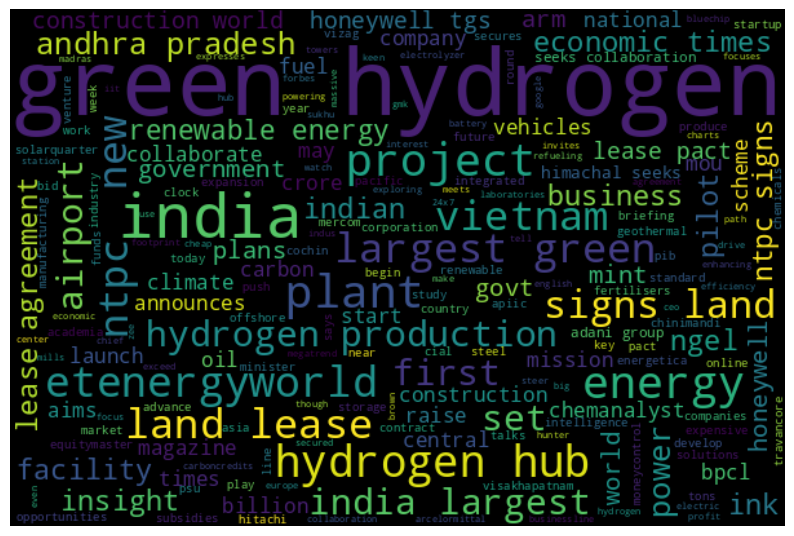

In [120]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [121]:
daata.text_string_lem.value_counts()

green hydrogen google news                                                                                       1
ntpc signs land lease pact set green hydrogen hub visakhapatnam new indian express                               1
green hydrogen fuel getting cheaper port rotterdam theloadstar com                                               1
ngel signs land lease agreement apiic integrated green hydrogen hub startupnews fyi                              1
haryana green hydrogen planning committee hghpc saurenergy                                                       1
                                                                                                                ..
ngel signs land lease agreement apiic integrated green hydrogen hub power line magazine power line magazine      1
hydrogen gamechanger heavy industries infrastructure etenergyworld                                               1
govt working draft scheme firm dispatchable round clock renewable energy using g

In [122]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [123]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [124]:
daata['polarity'] = daata['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
daata.tail(3)

,Unnamed: 0,Title,Date,Score,text_string_lem,is_equal,polarity
97,97,green hydrogen pilots india conference held ru...,"Thu, 22 Feb 2024 15:12:00 GMT",,green hydrogen pilots india conference held ru...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
98,98,japanese energy companies launch country large...,"Fri, 23 Feb 2024 09:44:16 GMT",,japanese energy companies launch country large...,True,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp..."
99,99,vietnam aims produce mtpa hydrogen 2050 view,"Fri, 23 Feb 2024 07:56:00 GMT",,vietnam aims produce mtpa hydrogen 2050 view,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [126]:
df1 = pd.concat(
    [daata.drop(['Unnamed:0','polarity','Date','Score','text_string_lem'], axis=1),
     daata['polarity'].apply(pd.Series)], axis=1)
df1.head(3)

KeyError: "['Unnamed:0'] not found in axis"

In [127]:
df1['sentiment'] = df1['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df1

,Unnamed: 0,Title,is_equal,neg,neu,pos,compound,sentiment
0,0,green hydrogen google news,True,0.0,1.000,0.000,0.0000,neutral
1,1,green hydrogen expensive use steel mills even ...,True,0.0,0.816,0.184,0.4019,positive
2,2,government meets academia industry steer proje...,True,0.0,1.000,0.000,0.0000,neutral
3,3,indian government announces massive new green ...,True,0.0,1.000,0.000,0.0000,neutral
4,4,24x7 power green storage works economic times,True,0.0,1.000,0.000,0.0000,neutral
...,...,...,...,...,...,...,...,...
95,95,green hydrogen enabling measures roadmap india...,True,0.0,1.000,0.000,0.0000,neutral
96,96,bmw ix5 signals company push hydrogen ieee spe...,True,0.0,1.000,0.000,0.0000,neutral
97,97,green hydrogen pilots india conference held ru...,True,0.0,1.000,0.000,0.0000,neutral
98,98,japanese energy companies launch country large...,True,0.0,0.826,0.174,0.2732,positive


In [128]:
df1.loc[df1['compound'].idxmax()].values

array([62,
       'renewable energy market intelligence enables green hydrogen project development hitachi energy',
       True, 0.0, 0.523, 0.477, 0.743, 'positive'], dtype=object)

In [129]:
df1.loc[df1['compound'].idxmin()].values

array([83,
       'india green hydrogen move may worsen pollution steps place says study hindu',
       True, 0.231, 0.769, 0.0, -0.5106, 'negative'], dtype=object)

<ipython-input-130-a068fdd8ab29>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sentiment',


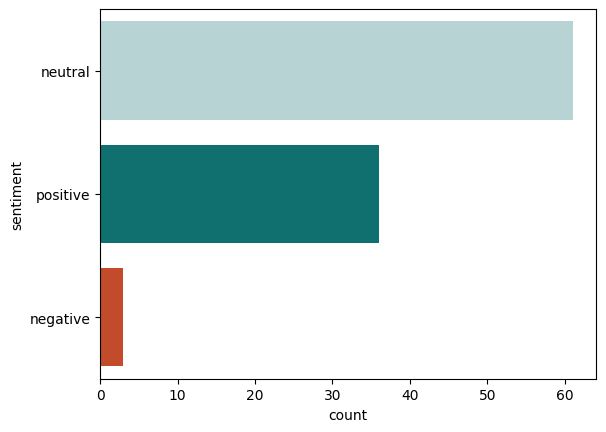

In [130]:
import seaborn as sns
sns.countplot(y='sentiment',
             data=df1,
             palette=['#b2d8d8',"#008080", '#db3d13']
             );